# Data Import

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

athlete_data = pd.read_csv('athlete_events.csv', index_col = 0)
regional_data = pd.read_csv('noc_regions.csv')
track_and_field_results = pd.read_csv('results.csv', names = ('Gender', 'Event', 'Location', 'Year', 'Medal', 'Name', 'Nationality', 'Result'))

#We are only using data from Track and Field Events so limiting for that
athlete_data = athlete_data[athlete_data['Sport'] == 'Athletics']

track_and_field_results.drop(0, axis=0, inplace = True)

# Data Cleaning
 - Replace Gold, Silver, Bronze, Other with 1, 2, 3, 4
 - Replace Male, Female with 1, 2
 - Replace Summer, Winter with 1, 2
 - Change Age to int, missing values = -1

## Map Strings to Integers

In [2]:
#First mapping track and field results file

track_and_field_results['Year'] = pd.to_numeric(track_and_field_results['Year'])

track_and_field_results['Medal'].replace('G', 1, inplace = True)
track_and_field_results['Medal'].replace('S', 2, inplace = True)
track_and_field_results['Medal'].replace('B', 3, inplace = True)
track_and_field_results['Medal'].replace(np.nan, 4, inplace = True)

track_and_field_results['Gender'].replace('M', 1, inplace = True)
track_and_field_results['Gender'].replace('W', 2, inplace = True)

In [3]:
#Mapping athlete data

athlete_data['Medal'].replace('Gold', 1, inplace = True)
athlete_data['Medal'].replace('Silver', 2, inplace = True)
athlete_data['Medal'].replace('Bronze', 3, inplace = True)
athlete_data['Medal'].replace(np.nan, 4, inplace = True)

athlete_data['Sex'].replace('M', 1, inplace = True)
athlete_data['Sex'].replace('F', 2, inplace = True)

athlete_data['Season'].replace('Summer', 1, inplace = True)
athlete_data['Season'].replace('Winter', 2, inplace = True)

athlete_data['Age'].replace(np.nan, -1, inplace = True)
athlete_data['Age'] = athlete_data['Age'].astype(int)

athlete_data.sort_values('Year', ascending = True, inplace = True)

## Make Data Subsets
 - Medal wins, No Medals Won
 - Summer Sports, Winter Sports

### By Medal Count

In [4]:
# Read athlete_data[athlete_data['Medal'] == 1] as "athlete_data where athlete_data's medal column equals 1"
medal_wins = athlete_data[athlete_data['Medal'] != 4]
non_medal_wins = athlete_data[athlete_data['Medal'] == 4]

summer_sports = athlete_data[athlete_data['Season'] == 1]
winter_sports = athlete_data[athlete_data['Season'] == 2]

## By Athletic Event
 - 1500m 
 - High jump
 - Javelin
 - 100m hurdles 110m hurdles
 - shotput
 - 4x100 relay


In [5]:
mens_100m = track_and_field_results[track_and_field_results['Event'] == '100M Men']

womens_100m = track_and_field_results[track_and_field_results['Event'] == '100M Women']

mens_1500m = track_and_field_results[track_and_field_results['Event'] == '1500M Men']

womens_1500m = track_and_field_results[track_and_field_results['Event'] == '1500M Women']

mens_relay = track_and_field_results[track_and_field_results['Event'] == '4X100M Relay Men']

womens_relay = track_and_field_results[track_and_field_results['Event'] == '4X100M Relay Women']

mens_high_jump = track_and_field_results[track_and_field_results['Event'] == 'High Jump Men']

womens_high_jump = track_and_field_results[track_and_field_results['Event'] == 'High Jump Women']

mens_javelin = track_and_field_results[track_and_field_results['Event'] == 'Javelin Throw Men']

womens_javelin = track_and_field_results[track_and_field_results['Event'] == 'Javelin Throw Women']

mens_shot_put = track_and_field_results[track_and_field_results['Event'] == 'Shot Put Men']

womens_shot_put = track_and_field_results[track_and_field_results['Event'] == 'Shot Put Men']

# Run Regression on Gold Medal Winning Attempts

## Mens 100M Dash

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  -0.012597246503496584 , Intercept:  34.982566045066186


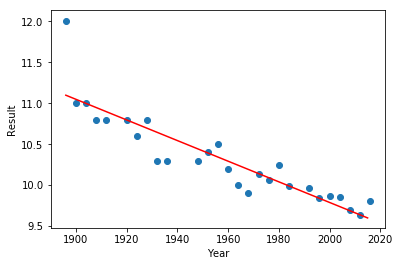

In [11]:
mens_100m_gold = mens_100m[mens_100m['Medal'] == 1]

mens_100m_gold['Result'] = pd.to_numeric(mens_100m_gold['Result'])


mens_100m_slope, mens_100m_intercept = np.polyfit( mens_100m_gold['Year'], mens_100m_gold['Result'], 1)
print('Slope: ', mens_100m_slope, ", Intercept: ", mens_100m_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_100m_slope * year + mens_100m_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_100m_gold['Year'], mens_100m_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f1 = plt.gcf()

## Womens 100M Dash

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  -0.014290271636133951 , Intercept:  39.40350221099184


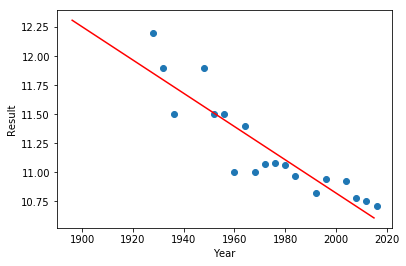

In [10]:
womens_100m_gold = womens_100m[womens_100m['Medal'] == 1]

womens_100m_gold['Result'] = pd.to_numeric(womens_100m_gold['Result'])


womens_100m_slope, womens_100m_intercept = np.polyfit( womens_100m_gold['Year'], womens_100m_gold['Result'], 1)
print('Slope: ', womens_100m_slope, ", Intercept: ", womens_100m_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_100m_slope * year + womens_100m_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_100m_gold['Year'], womens_100m_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f2 = plt.gcf()

## Mens Mile

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Slope:  -0.3141298805361336 , Intercept:  841.6409602434657


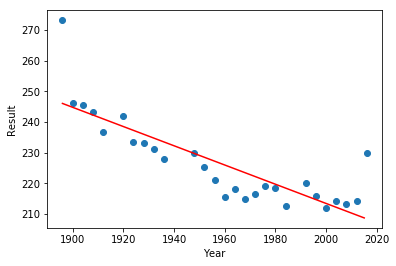

In [14]:
mens_1500m_gold = mens_1500m[mens_1500m['Medal'] == 1]

mens_1500m_gold['Result'] = (pd.to_datetime(mens_1500m_gold['Result'], format = "%M:%S.%f") - pd.to_datetime('1900-01-01'))
mens_1500m_gold['Result'] = mens_1500m_gold['Result'].apply(lambda x: pd.Timedelta.total_seconds(x))

mens_1500m_gold['Result'] = pd.to_numeric(mens_1500m_gold['Result'])

mens_1500m_slope, mens_1500m_intercept = np.polyfit( mens_1500m_gold['Year'], mens_1500m_gold['Result'], 1)
print('Slope: ', mens_1500m_slope, ", Intercept: ", mens_1500m_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_1500m_slope * year + mens_1500m_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_1500m_gold['Year'], mens_1500m_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f3 = plt.gcf()

## Womens Mile

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

Slope:  0.06490802675585255 , Intercept:  112.15028428093693


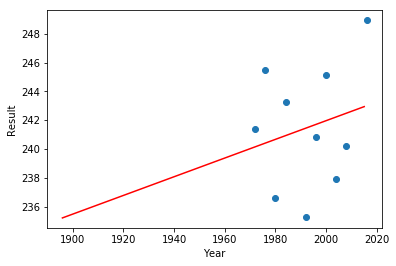

In [15]:
womens_1500m_gold = womens_1500m[womens_1500m['Medal'] == 1]

womens_1500m_gold['Result'] = (pd.to_datetime(womens_1500m_gold['Result'], format = "%M:%S.%f") - pd.to_datetime('1900-01-01'))
womens_1500m_gold['Result'] = womens_1500m_gold['Result'].apply(lambda x: pd.Timedelta.total_seconds(x))

womens_1500m_gold['Result'] = pd.to_numeric(womens_1500m_gold['Result'])

womens_1500m_slope, womens_1500m_intercept = np.polyfit( womens_1500m_gold['Year'], womens_1500m_gold['Result'], 1)
print('Slope: ', womens_1500m_slope, ", Intercept: ", womens_1500m_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_1500m_slope * year + womens_1500m_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_1500m_gold['Year'], womens_1500m_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f4 = plt.gcf()

## Mens 4x100 Relay

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

Slope:  -0.048671529462120305 , Intercept:  134.77079825938117


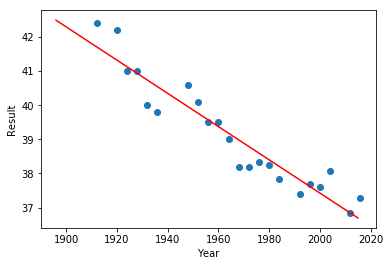

In [17]:
mens_relay_gold = mens_relay[mens_relay['Medal'] == 1]
mens_relay_gold['Result'] = mens_relay_gold['Result'].str.replace('0:', '')

mens_relay_gold['Result'] = (pd.to_datetime(mens_relay_gold['Result'], format = "%S.%f") - pd.to_datetime('1900-01-01'))
mens_relay_gold['Result'] = mens_relay_gold['Result'].apply(lambda x: pd.Timedelta.total_seconds(x))

mens_relay_slope, mens_relay_intercept = np.polyfit( mens_relay_gold['Year'], mens_relay_gold['Result'], 1)
print('Slope: ', mens_relay_slope, ", Intercept: ", mens_relay_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_relay_slope * year + mens_relay_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_relay_gold['Year'], mens_relay_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f5 = plt.gcf()

## Womens 4x100 Relay

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Slope:  -0.07907833970009617 , Intercept:  199.7074582359299


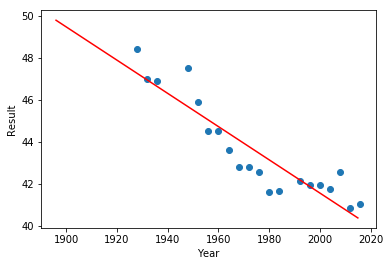

In [18]:
womens_relay_gold = womens_relay[womens_relay['Medal'] == 1]

womens_relay_gold['Result'] = (pd.to_datetime(womens_relay_gold['Result'], format = "%S.%f") - pd.to_datetime('1900-01-01'))
womens_relay_gold['Result'] = womens_relay_gold['Result'].apply(lambda x: pd.Timedelta.total_seconds(x))

womens_relay_slope, womens_relay_intercept = np.polyfit( womens_relay_gold['Year'], womens_relay_gold['Result'], 1)
print('Slope: ', womens_relay_slope, ", Intercept: ", womens_relay_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_relay_slope * year + womens_relay_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_relay_gold['Year'], womens_relay_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f6 = plt.gcf()


## Mens High Jump

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Slope:  0.005045386559389362 , Intercept:  -7.738421785548537


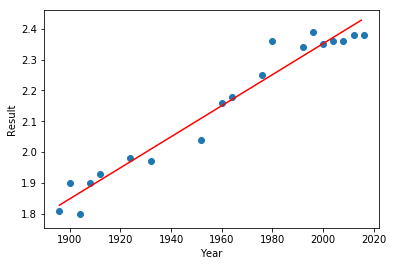

In [20]:
mens_high_jump_gold = mens_high_jump[mens_high_jump['Medal'] == 1]
mens_high_jump_gold['Result'] = pd.to_numeric(mens_high_jump_gold['Result'])

mens_high_jump_slope, mens_high_jump_intercept = np.polyfit( mens_high_jump_gold['Year'], mens_high_jump_gold['Result'], 1)
print('Slope: ', mens_high_jump_slope, ", Intercept: ", mens_high_jump_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_high_jump_slope * year + mens_high_jump_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_high_jump_gold['Year'], mens_high_jump_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f7 = plt.gcf()

## Womens High Jump

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  0.00545584862385327 , Intercept:  -8.896517584097975


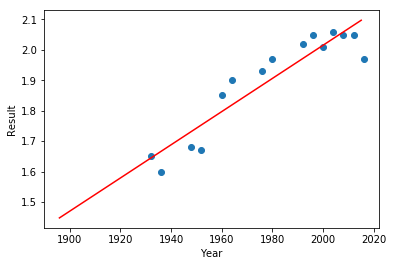

In [21]:
womens_high_jump_gold = womens_high_jump[womens_high_jump['Medal'] == 1]
womens_high_jump_gold.at[2166, 'Result'] = 1.97
womens_high_jump_gold['Result'] = pd.to_numeric(womens_high_jump_gold['Result'])

womens_high_jump_slope, womens_high_jump_intercept = np.polyfit( womens_high_jump_gold['Year'], womens_high_jump_gold['Result'], 1)
print('Slope: ', womens_high_jump_slope, ", Intercept: ", womens_high_jump_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_high_jump_slope * year + womens_high_jump_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_high_jump_gold['Year'], womens_high_jump_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f8 = plt.gcf()

## Mens Javelin

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  0.3024389671361496 , Intercept:  -514.8855399061022


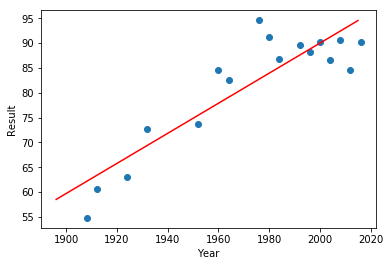

In [28]:
mens_javelin_gold = mens_javelin[mens_javelin['Medal'] == 1]
mens_javelin_gold.at[1263, 'Result'] = 90.30
mens_javelin_gold['Result'] = pd.to_numeric(mens_javelin_gold['Result'])

mens_javelin_slope, mens_javelin_intercept = np.polyfit( mens_javelin_gold['Year'], mens_javelin_gold['Result'], 1)
print('Slope: ', mens_javelin_slope, ", Intercept: ", mens_javelin_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_javelin_slope * year + mens_javelin_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_javelin_gold['Year'], mens_javelin_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f9 = plt.gcf()


## Womens Javelin

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  0.3336552083333353 , Intercept:  -598.3696166666704


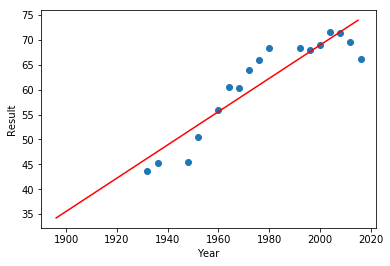

In [23]:
womens_javelin_gold = womens_javelin[womens_javelin['Medal'] == 1]

womens_javelin_gold['Result'] = pd.to_numeric(womens_javelin_gold['Result'])

womens_javelin_slope, womens_javelin_intercept = np.polyfit( womens_javelin_gold['Year'], womens_javelin_gold['Result'], 1)
print('Slope: ', womens_javelin_slope, ", Intercept: ", womens_javelin_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_javelin_slope * year + womens_javelin_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_javelin_gold['Year'], womens_javelin_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f10 = plt.gcf()

In [ ]:
## Men's Shotput

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  0.08021636049147125 , Intercept:  -138.71410020279208


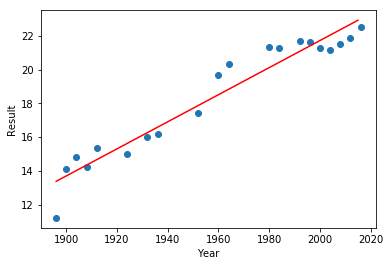

In [24]:
mens_shot_put_gold = mens_shot_put[mens_shot_put['Medal'] == 1]

mens_shot_put_gold['Result'] = pd.to_numeric(mens_shot_put_gold['Result'])

mens_shot_put_slope, mens_shot_put_intercept = np.polyfit( mens_shot_put_gold['Year'], mens_shot_put_gold['Result'], 1)
print('Slope: ', mens_shot_put_slope, ", Intercept: ", mens_shot_put_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(mens_shot_put_slope * year + mens_shot_put_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(mens_shot_put_gold['Year'], mens_shot_put_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f11 = plt.gcf()

C:\Users\noahl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Slope:  0.08021636049147125 , Intercept:  -138.71410020279208


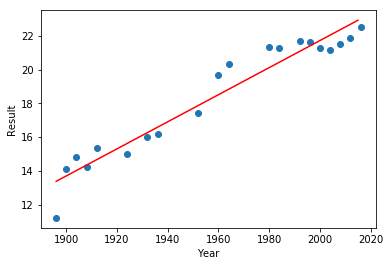

In [25]:
womens_shot_put_gold = womens_shot_put[womens_shot_put['Medal'] == 1]

womens_shot_put_gold['Result'] = pd.to_numeric(womens_shot_put_gold['Result'])

womens_shot_put_slope, womens_shot_put_intercept = np.polyfit( womens_shot_put_gold['Year'], womens_shot_put_gold['Result'], 1)
print('Slope: ', womens_shot_put_slope, ", Intercept: ", womens_shot_put_intercept)

#Scatter and Line
year = np.arange(1896, 2016)
pred_result = np.array(womens_shot_put_slope * year + womens_shot_put_intercept)

plt.xlabel('Year')
plt.ylabel('Result')
plt.scatter(womens_shot_put_gold['Year'], womens_shot_put_gold['Result'])
plt.plot(year, pred_result, color = 'red')
f12 = plt.gcf()